In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [50]:
a = pd.read_csv("telecom_churn_data.csv")
a.head() #reading the data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [51]:
a.shape #checking the shape and description of the data

(99999, 226)

In [52]:
a.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


creating a copy of the dataset for analysis


In [53]:
churn_data = a.copy()
all_columns = a.columns.tolist()

In [54]:
rech_col = [col for col in all_columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [55]:
# calculating amount of average
churn_data['total_data_rech_amt_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']
churn_data['total_data_rech_amt_9'] = churn_data['av_rech_amt_data_9'] * churn_data['total_rech_data_9']
churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

# Finding the average recharge amount for good phase i.e 6th and 7th month
good_phase_average_rech_amt = ( churn_data['total_rech_amt_6'].fillna(0) + churn_data['total_rech_amt_7'].fillna(0) +
                               churn_data['total_data_rech_amt_6'].fillna(0) + churn_data['total_data_rech_amt_7'].fillna(0) ) / 2

# 70 percentile of the good_phase_average_rech_amt data
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

# Keep high value customer data
churn_data = churn_data[good_phase_average_rech_amt >= gd_phase_avg_rech_amt_70]

print(f'Shape of high value customer data: {churn_data.shape}')

70 Percentile of recharge amount is : 478.0
Shape of high value customer data: (30001, 222)


In [56]:
# Seperating columns for the 9th month
mnth9_columns = [col for col in all_columns if '9' in col]

# Seperating the ic columns
mnth9_ic_columns = [col for col in mnth9_columns if 'ic' in col and 'mou' in col]

# Seperating oc columns
mnth9_oc_columns = [col for col in mnth9_columns if 'oc' in col and 'mou' in col]

# Seperating vol columns
mnth9_vol_columns = [col for col in mnth9_columns if 'vol' in col and 'mb' in col]
# Sum of all the ic columns
churn_data['ic_sum']  = raw_data[mnth9_ic_columns].sum(axis = 1)

# Sum of all the oc columns
churn_data['oc_sum'] = raw_data[mnth9_oc_columns].sum(axis = 1)

# Sum of all the vol columns
churn_data['vol_sum'] = raw_data[mnth9_vol_columns].sum(axis = 1)
churn_tag_columns = ['vol_sum', 'oc_sum', 'ic_sum']

# Create churn as the sum of newly aggregrated columns, as that will be 0 if all of the columns have 0 values
churn_data['churn'] = churn_data[churn_tag_columns].sum(axis = 1)

churn_data.head(15)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,164.17,0.00,268.89
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,554.79,0.00,1312.59
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,450.31,328.67,1161.40
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,977.020,...,1714.67,0.00,5285.0,20424.0,455.0,1814.0,280.39,36.47,5619.03,5935.89
38,7000815202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,363.987,...,0.00,0.00,NaN,NaN,NaN,207.0,342.25,233.32,0.00,575.57
41,7000721289,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,482.832,...,0.00,0.00,NaN,NaN,NaN,NaN,355.29,217.00,0.00,572.29
48,7000294396,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1873.271,...,0.00,0.00,NaN,NaN,NaN,NaN,2684.39,3940.49,0.00,6624.88
53,7002188521,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,978.077,...,0.00,0.00,344.0,575.0,23.0,92.0,2041.52,1726.87,0.82,3769.21


In [57]:
# If the churn value is greater than 0 that means the user used a service indicating an active user
churn_data['churn'] = churn_data['churn'].apply(lambda x: 0 if x > 0 else 1)
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,164.17,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,554.79,0.00,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,450.31,328.67,0


In [58]:
churn_data.churn.value_counts(normalize=True)
# Dropping Month 9 Columns

churn_data.drop( [ col for col in mnth9_columns + churn_tag_columns if col not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],
                axis=1, inplace=True)
churn_data.shape

(30001, 171)

In [59]:
# Checking for missing values
msng_values = round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)
msng_values

total_data_rech_amt_9    49.27
arpu_3g_8                46.83
total_data_rech_amt_8    46.83
fb_user_8                46.83
max_rech_data_8          46.83
                         ...  
vol_2g_mb_6               0.00
vol_2g_mb_7               0.00
vol_2g_mb_8               0.00
vol_3g_mb_6               0.00
churn                     0.00
Length: 171, dtype: float64

In [60]:
# deleting columns with more than 40% missing values
drop_msng_col = msng_values[msng_values > 40].index.tolist()
drop_msng_col

['total_data_rech_amt_9',
 'arpu_3g_8',
 'total_data_rech_amt_8',
 'fb_user_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_6',
 'max_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'fb_user_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'date_of_last_rech_data_7',
 'total_data_rech_amt_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'night_pck_user_7',
 'fb_user_7']

In [61]:
# Drop columns > 40% missing
churn_data.drop(drop_msng_col, axis=1, inplace=True)
churn_data.shape


(30001, 143)

In [62]:

round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

loc_ic_mou_8          3.91
og_others_8           3.91
loc_og_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
spl_og_mou_8          3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 143, dtype: float64

In [63]:
# Drop rows with missing values
for col in churn_data.columns:
    churn_data = churn_data[~churn_data[col].isna()]

# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
churn               0.0
Length: 143, dtype: float64

In [64]:

date_col = [col for col in churn_data.columns if 'date' in col]
churn_data.drop(date_col, axis=1, inplace=True)
[col for col in churn_data.columns if 'date' in col]

[]

In [65]:
print(churn_data.shape)
churn_data.head(20)


(28163, 137)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,7000887461,109,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0
38,7000815202,109,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,...,0,0,0,0,1155,0.00,0.00,0.00,0.0,0
41,7000721289,109,0.0,0.0,0.0,482.832,425.764,229.769,86.39,118.88,...,0,0,0,0,2010,0.00,0.00,0.00,0.0,0
48,7000294396,109,0.0,0.0,0.0,1873.271,575.927,179.218,2061.69,881.43,...,0,0,0,0,1265,0.00,0.00,0.00,0.0,0
53,7002188521,109,0.0,0.0,0.0,978.077,1141.296,706.020,135.14,119.59,...,0,0,0,0,697,0.00,0.00,0.00,0.0,0
56,7002180748,109,0.0,0.0,0.0,452.624,320.548,368.807,34.46,43.11,...,0,0,0,0,729,277.97,535.63,1459.45,0.0,0


In [66]:
#Upon inspecting the dataframe, it becomes apparent that some columns, such as "circle_id," contain only a single value.
#Features of this nature indicate zero variance and, as a result, will not have any impact on our target variable.

In [67]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in churn_data.columns:
    if churn_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [68]:
#Dropping single value columns
churn_data.drop(drop_col_sngl_val, axis=1, inplace=True)
churn_data.shape

(28163, 127)

In [69]:
# Drop the column 'mobile_number' as it does not add any information
churn_data.drop('mobile_number', axis=1, inplace=True)
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


In [70]:
#We're checking how features are related to each other, and if we discover any features that are very strongly related, we will remove them.

In [71]:
corr = churn_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7       arpu_6         0.728704
arpu_8       arpu_6         0.671437
             arpu_7         0.778413
onnet_mou_7  onnet_mou_6    0.770224
onnet_mou_8  onnet_mou_6    0.646114
                              ...   
aug_vbc_3g   vol_3g_mb_8    0.620313
jul_vbc_3g   vol_3g_mb_7    0.651025
             aug_vbc_3g     0.706559
jun_vbc_3g   vol_3g_mb_6    0.662497
             jul_vbc_3g     0.680020
Length: 207, dtype: float64

In [72]:
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7',
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
churn_data.drop(drop_col_corr, axis=1, inplace=True)
churn_data.shape

(28163, 87)

In [73]:
# Create a total mou instead of offnet and onnet

churn_data['total_mou_6'] = churn_data['onnet_mou_6'] + churn_data['offnet_mou_6']
churn_data['total_mou_7'] = churn_data['onnet_mou_7'] + churn_data['offnet_mou_7']
churn_data['total_mou_8'] = churn_data['onnet_mou_8'] + churn_data['offnet_mou_8']

# Drop the redundant columns
churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

churn_data.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,...,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,720,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,1,604,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00


In [74]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in churn_data.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    churn_data[f'gd_ph_{col}'] = ( churn_data[f'{col}_6'] + churn_data[f'{col}_7'] ) / 2
    churn_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)

churn_data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_loc_og_t2c_mou,gd_ph_std_og_t2f_mou,gd_ph_isd_ic_mou,gd_ph_total_mou,gd_ph_std_ic_t2f_mou,gd_ph_roam_ic_mou,gd_ph_loc_og_mou,gd_ph_last_day_rch_amt,gd_ph_sachet_3g,gd_ph_max_rech_amt
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,0.0,13.37,8.295,566.555,43.215,24.86,478.035,0.0,0.0,1185.0
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.0,0.00,0.000,470.005,0.000,0.00,333.135,25.0,0.0,122.0
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.0,0.00,0.000,944.565,0.000,0.00,95.565,25.0,0.0,50.0
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,0.0,0.00,14.115,137.195,0.000,0.00,132.795,89.5,0.0,89.5
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,0.0,0.00,0.000,0.000,0.595,0.00,0.000,126.0,2.0,753.5


In [75]:
#The VBC columns lack a month-specific suffix, which caused them to be overlooked. Let's calculate the average for these columns as well.

In [76]:
# Create new column
churn_data['gd_ph_vbc_3g'] = ( churn_data['jul_vbc_3g'] + churn_data['jun_vbc_3g'] ) / 2

# Drop redundant column
churn_data.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
churn_data['vbc_3g_8'] = churn_data['aug_vbc_3g']
churn_data.drop('aug_vbc_3g', axis=1, inplace=True)

churn_data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_isd_ic_mou,gd_ph_total_mou,gd_ph_std_ic_t2f_mou,gd_ph_roam_ic_mou,gd_ph_loc_og_mou,gd_ph_last_day_rch_amt,gd_ph_sachet_3g,gd_ph_max_rech_amt,gd_ph_vbc_3g,vbc_3g_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,8.295,566.555,43.215,24.86,478.035,0.0,0.0,1185.0,19.060,57.74
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.000,470.005,0.000,0.00,333.135,25.0,0.0,122.0,516.405,21.03
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.000,944.565,0.000,0.00,95.565,25.0,0.0,50.0,0.000,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,14.115,137.195,0.000,0.00,132.795,89.5,0.0,89.5,25.930,40.45
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,0.000,0.000,0.595,0.00,0.000,126.0,2.0,753.5,2210.750,358.10


In [77]:
churn_data.reset_index(inplace=True, drop=True)
churn_data.head()
churn_data.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_isd_ic_mou,gd_ph_total_mou,gd_ph_std_ic_t2f_mou,gd_ph_roam_ic_mou,gd_ph_loc_og_mou,gd_ph_last_day_rch_amt,gd_ph_sachet_3g,gd_ph_max_rech_amt,gd_ph_vbc_3g,vbc_3g_8
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,...,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,13.145865,20.926258,1.789363,247.845569,1.646062,322.121339,1.989213,6.889342,0.061151,...,11.458002,656.094111,2.835280,14.632102,263.016895,98.522885,0.217200,167.748198,169.310408,173.745705
std,500.479643,76.125433,107.722393,7.390599,367.353912,11.126142,615.275135,45.888765,20.813297,3.421503,...,74.792010,657.870003,18.312495,66.404361,361.575126,108.064480,0.940707,148.011960,395.513994,424.621028
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,258.075500,0.000000,0.000000,0.000000,31.410000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,178.822500,0.000000,0.000000,45.762500,30.000000,0.000000,104.000000,0.000000,0.000000
50%,445.338000,0.000000,0.000000,0.000000,124.060000,0.000000,34.990000,0.000000,0.700000,0.000000,...,0.000000,499.265000,0.000000,0.000000,140.590000,77.000000,0.000000,128.000000,0.000000,0.000000
75%,675.208500,0.000000,0.000000,0.130000,325.160000,0.000000,392.840000,0.000000,6.640000,0.000000,...,0.540000,922.932500,0.750000,1.715000,347.185000,124.000000,0.000000,198.000000,157.682500,142.470000
max,33543.624000,4169.810000,5337.040000,351.830000,11039.910000,516.910000,13980.060000,5681.540000,954.510000,394.930000,...,5651.025000,9344.465000,1185.045000,3060.600000,6582.420000,3100.000000,26.500000,3299.000000,8190.585000,12916.220000


Observation
1. We notice that nearly all columns contain outliers. Most of these outliers occur because the service was not used and not due to actual unusual data. Since we lack actual business context to verify the data's accuracy, we will set limits on those features.

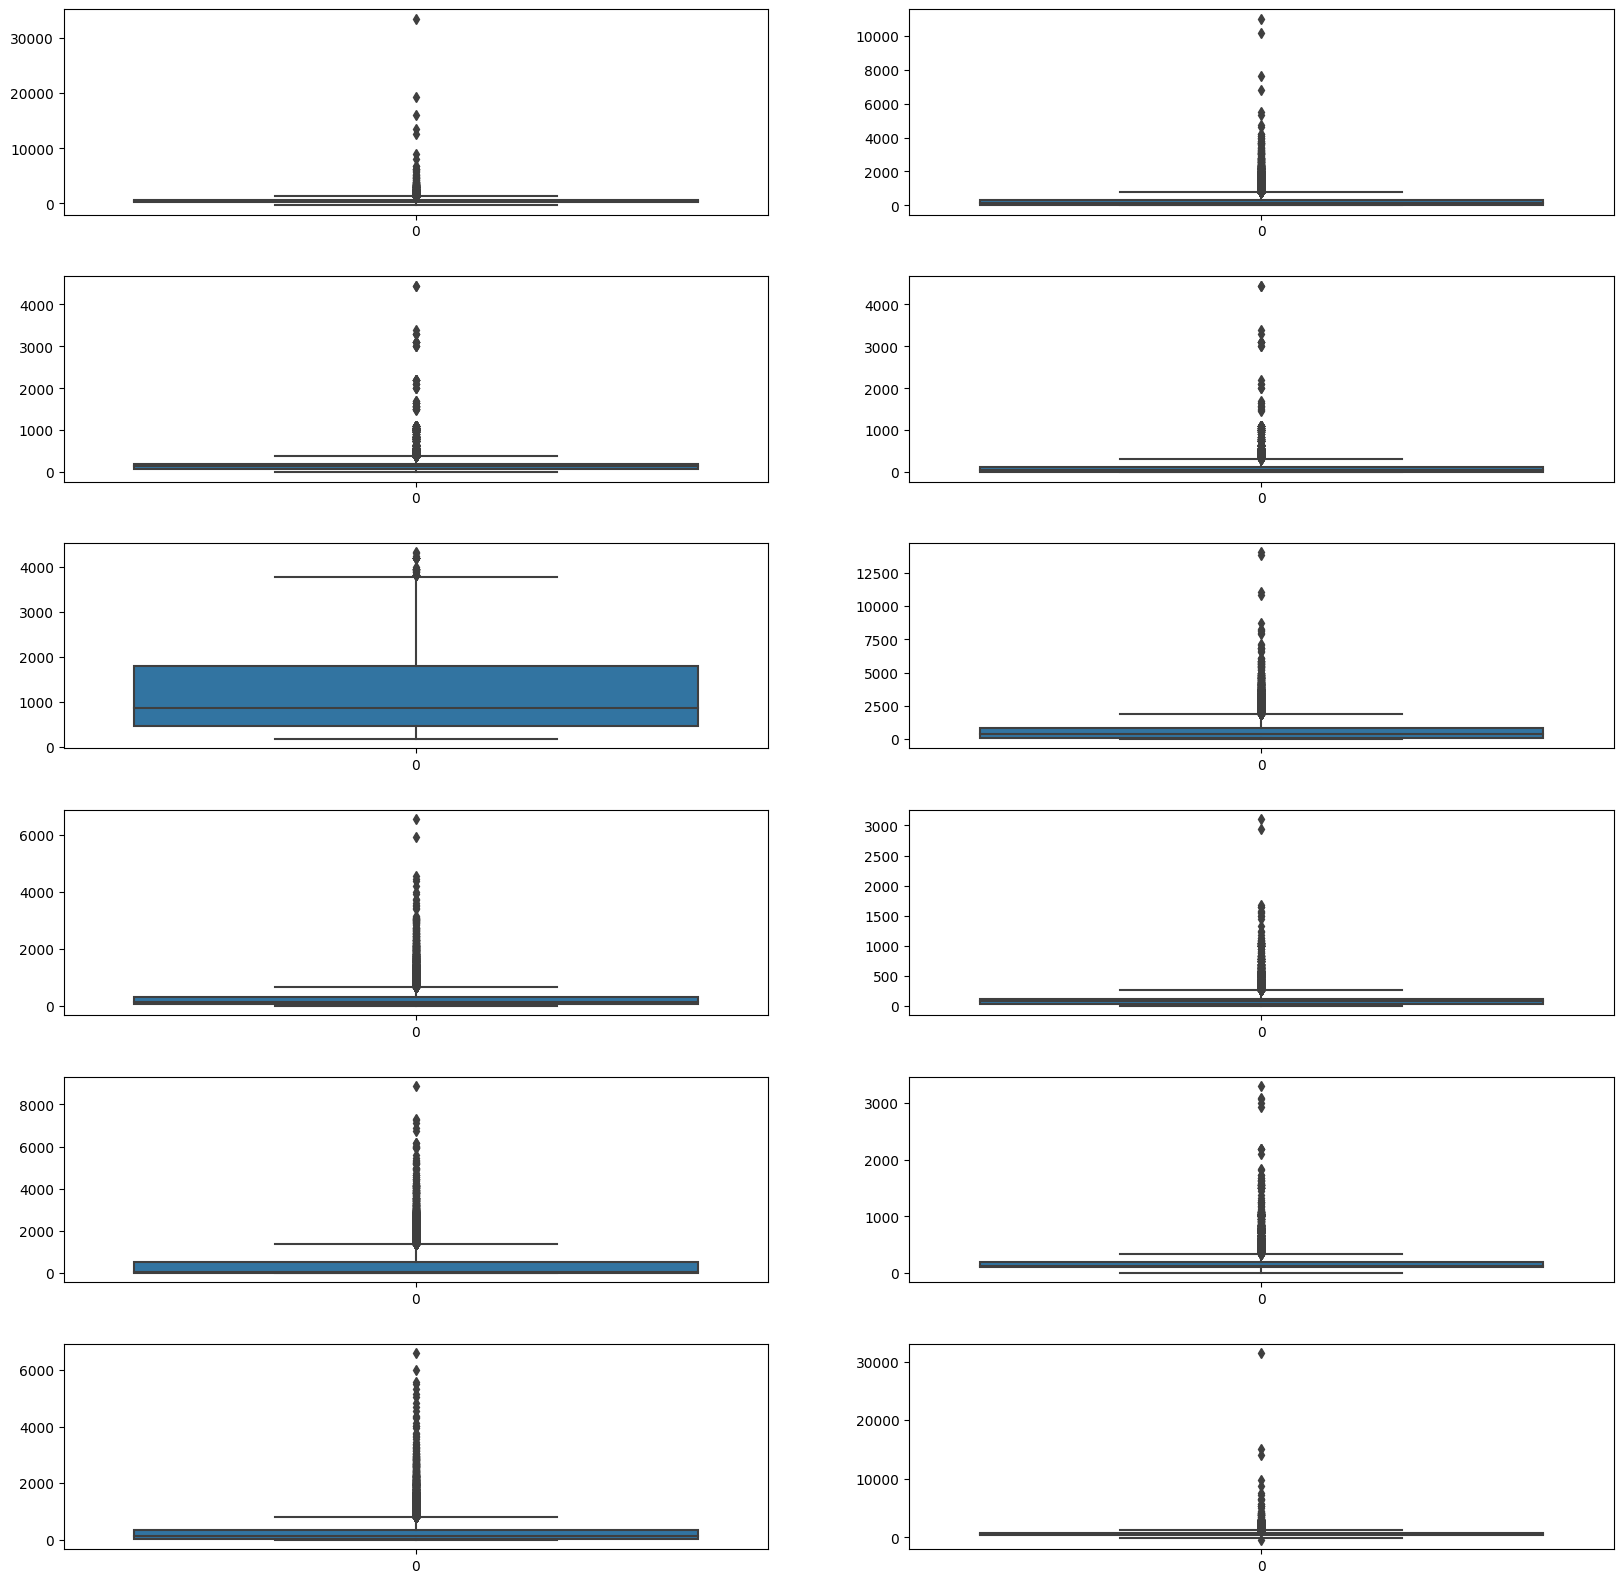

In [78]:
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8',
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt',
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(churn_data[col], ax=axes[i, j])

plt.subplots_adjust(hspace=0.3)
plt.show()

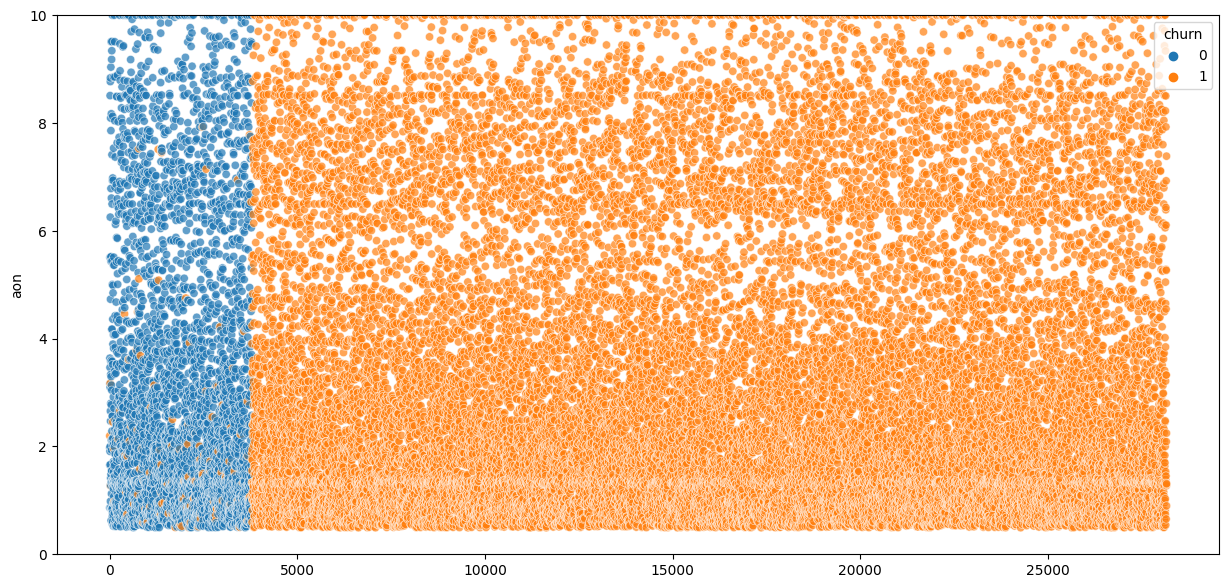

In [79]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=churn_data['aon'] / 365, x=churn_data.index, hue=churn_data.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

In [80]:
#Though we cannot see a clear pattern here, but we can notice that the mojority of churners had a tenure of less than 4 years

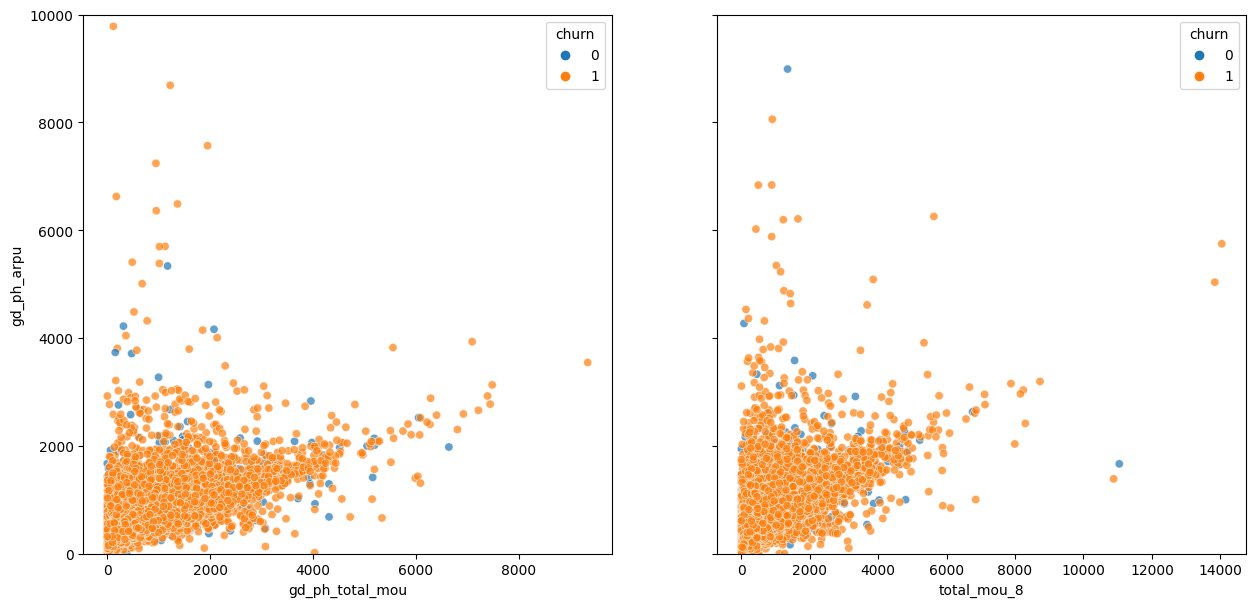

In [81]:
# Lets check how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=churn_data, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

In [82]:
#It's evident that the MOU (Minutes of Usage) has decreased notably for the customers who churned during the action phase, which is the 8th month. This decline has a direct impact on the revenue generated from these customers.

#What's intriguing is that even though the MOU falls within the range of 0-2000 minutes, the revenue is highest in that range. This suggests that these users may have been using other services that significantly contributed to the overall revenue.

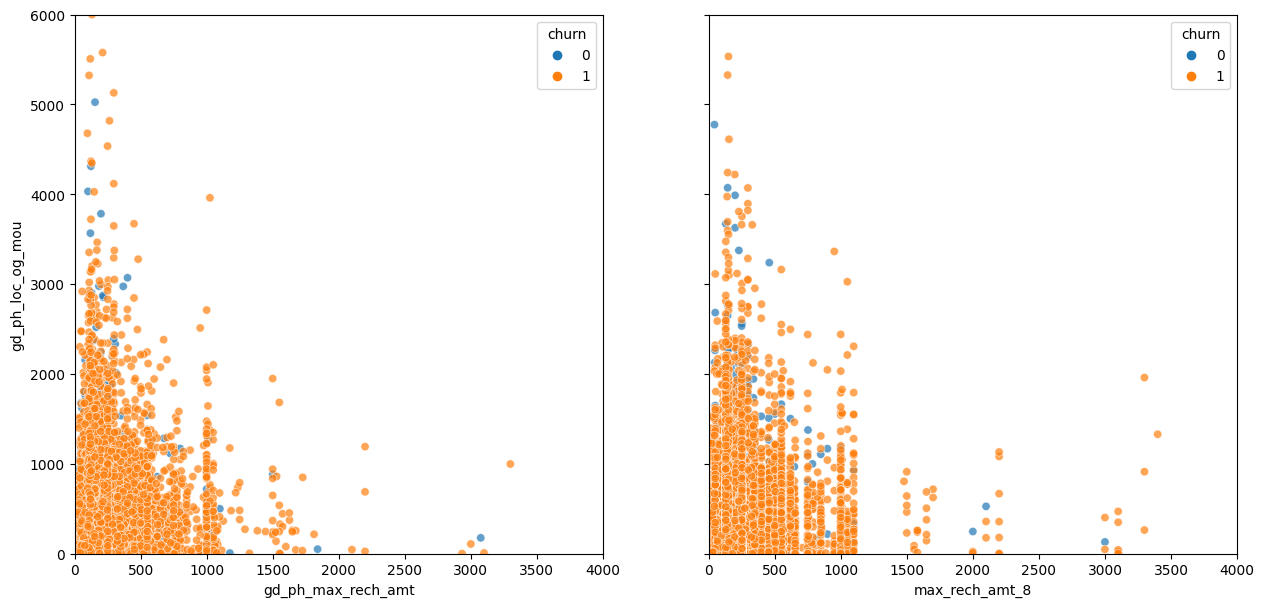

In [83]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=churn_data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

In [84]:
#Observations
#Users who were recharging with high amounts were using the service for local uses less as compared to user who did lesser amounts of recharge
#Intuitevly people whose max recharge amount as well as local out going were very less even in the good phase churned more

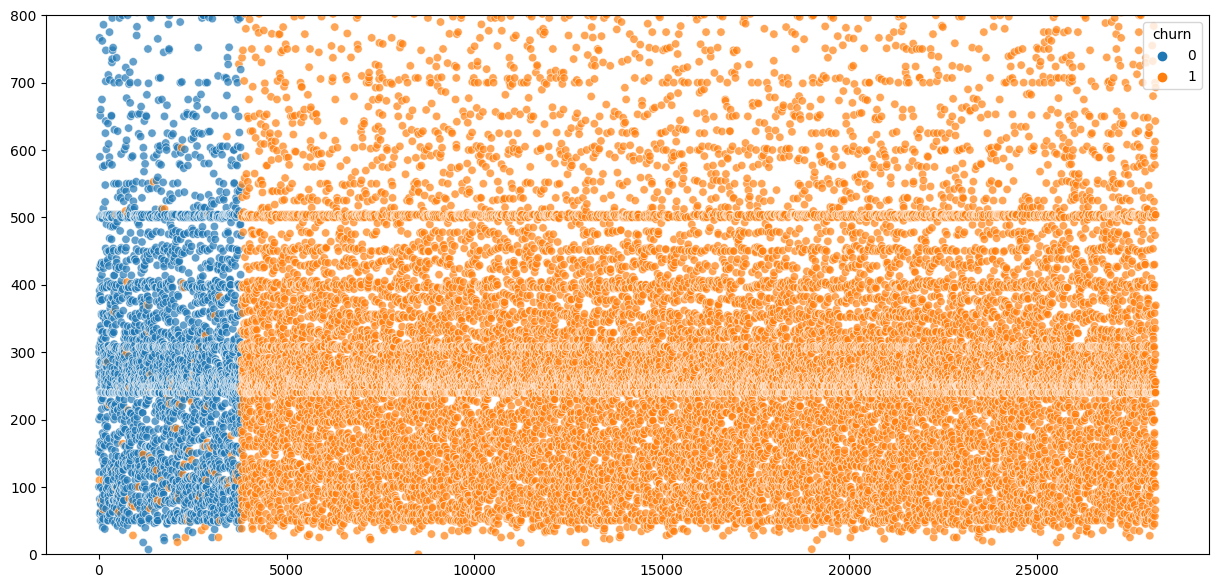

In [85]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=churn_data.index, y=churn_data['gd_ph_max_rech_amt'] + churn_data['max_rech_amt_8'],
                hue=churn_data['churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

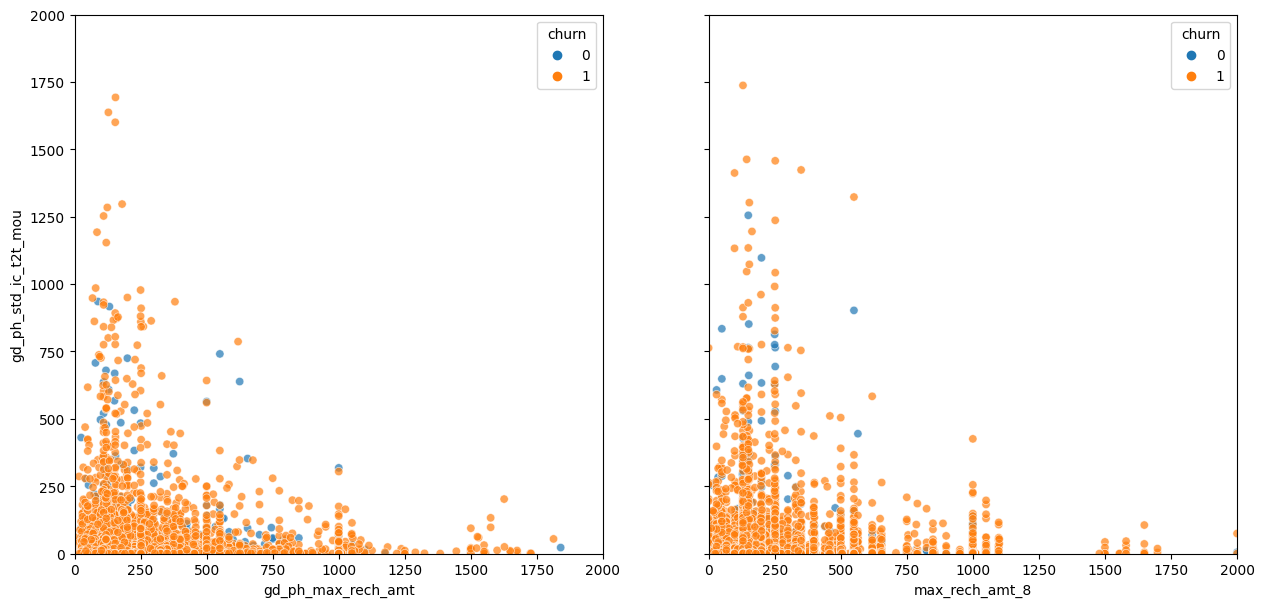

In [86]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=churn_data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()


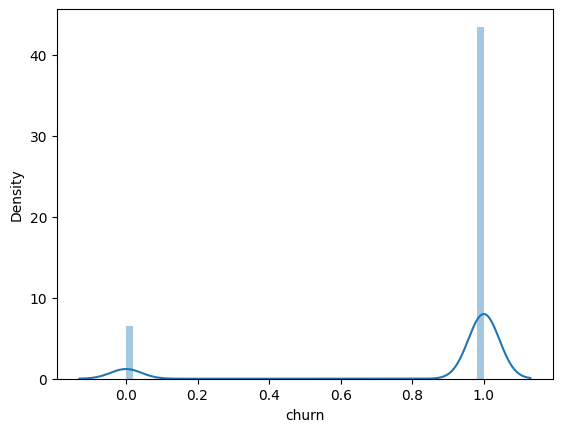

In [87]:
sns.distplot(churn_data['churn'])
plt.show()

In [88]:
# Cap the features with high outliers

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ),
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ),
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    churn_data[col] = churn_data[col].apply(lambda x : x if x < value else value)

churn_data[col_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_mou_8,gd_ph_loc_ic_mou,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_arpu
0,3171.480,255.79,1000,779,802,378.20,391.555,0.0,68.000,1185.0,478.035,1209.5150
1,137.362,63.04,30,10,315,171.56,52.630,25.0,136.870,122.0,333.135,435.4720
2,637.760,129.74,50,50,720,1068.53,106.505,25.0,848.990,50.0,95.565,556.1030
3,366.966,182.14,179,0,604,239.47,145.520,89.5,4.355,89.5,132.795,134.1235
4,409.230,0.00,455,455,1328,0.00,2.180,126.0,0.000,753.5,0.000,1669.9265


In [89]:
y = churn_data['churn']
X = churn_data.drop('churn', axis=1)

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns]) #standardizing

In [91]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y) #imbalance checking

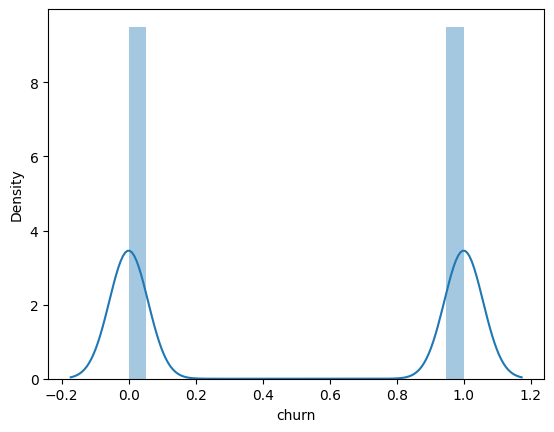

In [92]:
sns.distplot(y_res)
plt.show()

In [93]:
#pca
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(48998, 25)

##MODEL BUIDING

In [94]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [95]:
import statsmodels.api as sm

In [97]:
#logistic regression
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34298
Model:                            GLM   Df Residuals:                    34242
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23555.
Date:                Mon, 06 Nov 2023   Deviance:                       47109.
Time:                        13:41:13   Pearson chi2:                 3.43e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01267
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0207      0.011      1.875      0.061      -0.001       0.042
arpu_8                    -0.0199      0.035     -0.563      0.574      -0.089       0.049
roam_ic_mou_8             -0.0056      0.018     -0.311      0.756      -0.041       0.030
roam_og_mou_8              0.0966      0.029      3.278      0.001       0.039       0.154
loc_og_t2c_mou_8           0.0105      0.017      0.635      0.526      -0.022       0.043
loc_og_mou_8               0.0732      0.078      0.934      0.351      -0.080       0.227
std_og_t2f_mou_8           0.0189      0.018      1.027      0.305      -0.017       0.055
std_og_mou_8               0.3109      0.123      2.534      0.011       0.070       0.551
isd_og_mou_8               0.3032      0.073      4.150      0.000       0.160       0.446
spl_og_mou_8               0.0654      0.022      3.021      0.003       0.023       0.108
og_others_8               -0.0185      0.016     -1.168      0.243      -0.050       0.013
loc_ic_mou_8               0.0421      0.025      1.655      0.098      -0.008       0.092
std_ic_t2t_mou_8          -0.0047      0.022     -0.219      0.827      -0.047       0.038
std_ic_t2f_mou_8           0.0234      0.019      1.250      0.211      -0.013       0.060
std_ic_mou_8              -0.0321      0.024     -1.348      0.178      -0.079       0.015
spl_ic_mou_8               0.0214      0.012      1.741      0.082      -0.003       0.046
isd_ic_mou_8               0.0587      0.022      2.667      0.008       0.016       0.102
ic_others_8                0.0489      0.028      1.776      0.076      -0.005       0.103
total_rech_num_8          -0.0178      0.024     -0.744      0.457      -0.065       0.029
max_rech_amt_8             0.0251      0.020      1.243      0.214      -0.014       0.065
last_day_rch_amt_8        -0.0053      0.016     -0.333      0.739      -0.036       0.026
vol_2g_mb_8               -0.0122      0.016     -0.770      0.441      -0.043       0.019
monthly_2g_8              -0.0346      0.016     -2.147      0.032      -0.066      -0.003
sachet_2g_8               -0.0201      0.019     -1.039      0.299      -0.058       0.018
monthly_3g_8              -0.0145      0.020     -0.733      0.464      -0.053       0.024
sachet_3g_8                0.0139      0.017      0.831      0.406      -0.019       0.047
aon                        0.0284      0.012      2.336      0.019       0.005       0.052
total_mou_8               -0.3498      0.137     -2.545      0.011      -0.619      -0.080
gd_ph_og_others            0.0675      0.029      2.346      0.019       0.011       0.124
gd_ph_spl_og_mou           0.0320      0.023      1.363      0.173      -0.014       0.078
gd_ph_monthly_3g           0.0253      0.020      1.263      0.207      -0.014  

In [100]:
#RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_mou_8', 'gd_ph_og_others', 'gd_ph_spl_og_mou',
       'gd_ph_total_rech_num', 'gd_ph_std_ic_mou', 'gd_ph_isd_og_mou',
       'gd_ph_ic_others', 'gd_ph_std_og_mou', 'gd_ph_spl_ic_mou',
       'gd_ph_loc_og_t2c_mou', 'gd_ph_total_mou', 'gd_ph_roam_ic_mou',
       'gd_ph_loc_og_mou', 'gd_ph_sachet_3g', 'gd_ph_max_rech_amt',
       'vbc_3g_8'],
      dtype='object')

In [101]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34298
Model:                            GLM   Df Residuals:                    34272
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23576.
Date:                Mon, 06 Nov 2023   Deviance:                       47153.
Time:                        13:42:58   Pearson chi2:                 3.43e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01142
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0183      0.011      1.657      0.098      -0.003       0.040
arpu_8                  -0.0405      0.022     -1.820      0.069      -0.084       0.003
roam_og_mou_8            0.1015      0.028      3.657      0.000       0.047       0.156
loc_og_mou_8             0.1040      0.075      1.384      0.166      -0.043       0.251
std_og_mou_8             0.3578      0.119      3.018      0.003       0.125       0.590
isd_og_mou_8             0.3212      0.071      4.514      0.000       0.182       0.461
spl_og_mou_8             0.0705      0.018      3.895      0.000       0.035       0.106
loc_ic_mou_8             0.0612      0.015      4.210      0.000       0.033       0.090
isd_ic_mou_8             0.0524      0.015      3.444      0.001       0.023       0.082
ic_others_8              0.0455      0.027      1.676      0.094      -0.008       0.099
total_mou_8             -0.4039      0.132     -3.056      0.002      -0.663      -0.145
gd_ph_og_others          0.0608      0.028      2.165      0.030       0.006       0.116
gd_ph_spl_og_mou         0.0344      0.022      1.527      0.127      -0.010       0.078
gd_ph_total_rech_num     0.0509      0.015      3.487      0.000       0.022       0.080
gd_ph_std_ic_mou         0.0393      0.013      3.040      0.002       0.014       0.065
gd_ph_isd_og_mou        -0.1384      0.056     -2.477      0.013      -0.248      -0.029
gd_ph_ic_others          0.0850      0.032      2.661      0.008       0.022       0.148
gd_ph_std_og_mou         0.1917      0.079      2.419      0.016       0.036       0.347
gd_ph_spl_ic_mou         0.0835      0.018      4.527      0.000       0.047       0.120
gd_ph_loc_og_t2c_mou    -0.0389      0.015     -2.679      0.007      -0.067      -0.010
gd_ph_total_mou         -0.1709      0.089     -1.929      0.054      -0.344       0.003
gd_ph_roam_ic_mou        0.0559      0.017      3.373      0.001       0.023       0.088
gd_ph_loc_og_mou         0.1889      0.051      3.699      0.000       0.089       0.289
gd_ph_sachet_3g          0.0554      0.013      4.412      0.000       0.031       0.080
gd_ph_max_rech_amt       0.0761      0.015      5.097      0.000       0.047       0.105
vbc_3g_8                 0.0879      0.014      6.441      0.000       0.061       0.115
========================================================================================
"""

In [102]:
#checing on train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.451829,0
1,0,0.509577,1
2,0,0.513129,1
3,0,0.538507,1
4,0,0.594573,1


In [103]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()
#checking accuracy
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[11681  5540]
 [10174  6903]]

Accuracy : 0.5418391742958774


In [104]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,gd_ph_total_mou,53.36
9,total_mou_8,52.06
16,gd_ph_std_og_mou,44.08
3,std_og_mou_8,39.37
2,loc_og_mou_8,20.68
21,gd_ph_loc_og_mou,18.04
4,isd_og_mou_8,14.22
14,gd_ph_isd_og_mou,14.02
0,arpu_8,3.09
1,roam_og_mou_8,2.97


In [105]:
rfe_col = rfe_col.drop('total_mou_8', 1)

In [106]:

X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34298
Model:                            GLM   Df Residuals:                    34273
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23583.
Date:                Mon, 06 Nov 2023   Deviance:                       47166.
Time:                        13:44:17   Pearson chi2:                 3.43e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01103
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0174      0.011      1.576      0.115      -0.004       0.039
arpu_8                  -0.0425      0.022     -1.918      0.055      -0.086       0.001
roam_og_mou_8            0.0310      0.016      1.954      0.051   -8.69e-05       0.062
loc_og_mou_8            -0.1161      0.024     -4.835      0.000      -0.163      -0.069
std_og_mou_8             0.0108      0.022      0.488      0.625      -0.033       0.054
isd_og_mou_8             0.2992      0.071      4.219      0.000       0.160       0.438
spl_og_mou_8             0.0573      0.018      3.265      0.001       0.023       0.092
loc_ic_mou_8             0.0629      0.015      4.326      0.000       0.034       0.091
isd_ic_mou_8             0.0526      0.015      3.459      0.001       0.023       0.082
ic_others_8              0.0449      0.027      1.658      0.097      -0.008       0.098
gd_ph_og_others          0.0622      0.028      2.204      0.028       0.007       0.117
gd_ph_spl_og_mou         0.0380      0.022      1.697      0.090      -0.006       0.082
gd_ph_total_rech_num     0.0515      0.015      3.532      0.000       0.023       0.080
gd_ph_std_ic_mou         0.0390      0.013      3.016      0.003       0.014       0.064
gd_ph_isd_og_mou        -0.1454      0.056     -2.598      0.009      -0.255      -0.036
gd_ph_ic_others          0.0856      0.032      2.678      0.007       0.023       0.148
gd_ph_std_og_mou         0.0828      0.070      1.190      0.234      -0.054       0.219
gd_ph_spl_ic_mou         0.0840      0.018      4.553      0.000       0.048       0.120
gd_ph_loc_og_t2c_mou    -0.0417      0.015     -2.876      0.004      -0.070      -0.013
gd_ph_total_mou         -0.0611      0.079     -0.776      0.438      -0.216       0.093
gd_ph_roam_ic_mou        0.0450      0.016      2.837      0.005       0.014       0.076
gd_ph_loc_og_mou         0.1355      0.047      2.901      0.004       0.044       0.227
gd_ph_sachet_3g          0.0560      0.013      4.450      0.000       0.031       0.081
gd_ph_max_rech_amt       0.0774      0.015      5.188      0.000       0.048       0.107
vbc_3g_8                 0.0891      0.014      6.528      0.000       0.062       0.116
========================================================================================
"""

In [107]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.450631,0
1,0,0.511414,1
2,0,0.519463,1
3,0,0.536716,1
4,0,0.585384,1


In [108]:
#checking accuracy
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
print()
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[11653  5568]
 [10125  6952]]

Accuracy : 0.5424514548953292


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,gd_ph_total_mou,47.49
15,gd_ph_std_og_mou,37.89
20,gd_ph_loc_og_mou,16.70
4,isd_og_mou_8,14.10
13,gd_ph_isd_og_mou,14.00
2,loc_og_mou_8,4.46
3,std_og_mou_8,3.76
0,arpu_8,3.09
10,gd_ph_spl_og_mou,2.60
5,spl_og_mou_8,1.73


In [110]:
# Drop 'gd_ph_total_mou'
rfe_col = rfe_col.drop('gd_ph_total_mou', 1)
# new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34298
Model:                            GLM   Df Residuals:                    34274
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23583.
Date:                Mon, 06 Nov 2023   Deviance:                       47167.
Time:                        13:45:34   Pearson chi2:                 3.43e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01101
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0173      0.011      1.570      0.116      -0.004       0.039
arpu_8                  -0.0415      0.022     -1.874      0.061      -0.085       0.002
roam_og_mou_8            0.0266      0.015      1.797      0.072      -0.002       0.056
loc_og_mou_8            -0.1184      0.024     -4.971      0.000      -0.165      -0.072
std_og_mou_8             0.0078      0.022      0.356      0.722      -0.035       0.051
isd_og_mou_8             0.2983      0.071      4.208      0.000       0.159       0.437
spl_og_mou_8             0.0577      0.018      3.288      0.001       0.023       0.092
loc_ic_mou_8             0.0636      0.015      4.387      0.000       0.035       0.092
isd_ic_mou_8             0.0527      0.015      3.466      0.001       0.023       0.083
ic_others_8              0.0449      0.027      1.656      0.098      -0.008       0.098
gd_ph_og_others          0.0628      0.028      2.222      0.026       0.007       0.118
gd_ph_spl_og_mou         0.0358      0.022      1.611      0.107      -0.008       0.079
gd_ph_total_rech_num     0.0509      0.015      3.494      0.000       0.022       0.079
gd_ph_std_ic_mou         0.0394      0.013      3.045      0.002       0.014       0.065
gd_ph_isd_og_mou        -0.1488      0.056     -2.668      0.008      -0.258      -0.040
gd_ph_ic_others          0.0859      0.032      2.687      0.007       0.023       0.149
gd_ph_std_og_mou         0.0308      0.019      1.657      0.098      -0.006       0.067
gd_ph_spl_ic_mou         0.0842      0.018      4.563      0.000       0.048       0.120
gd_ph_loc_og_t2c_mou    -0.0413      0.014     -2.847      0.004      -0.070      -0.013
gd_ph_roam_ic_mou        0.0399      0.014      2.786      0.005       0.012       0.068
gd_ph_loc_og_mou         0.1036      0.022      4.679      0.000       0.060       0.147
gd_ph_sachet_3g          0.0559      0.013      4.445      0.000       0.031       0.081
gd_ph_max_rech_amt       0.0771      0.015      5.169      0.000       0.048       0.106
vbc_3g_8                 0.0889      0.014      6.514      0.000       0.062       0.116
========================================================================================
"""

In [111]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.450158,0
1,0,0.513142,1
2,0,0.518027,1
3,0,0.538271,1
4,0,0.585717,1


In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
print()
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[11660  5561]
 [10126  6951]]

Accuracy : 0.5426263922094583


In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,isd_og_mou_8,14.10
13,gd_ph_isd_og_mou,13.85
2,loc_og_mou_8,4.39
19,gd_ph_loc_og_mou,3.72
3,std_og_mou_8,3.63
0,arpu_8,3.07
15,gd_ph_std_og_mou,2.78
10,gd_ph_spl_og_mou,2.56
5,spl_og_mou_8,1.72
17,gd_ph_loc_og_t2c_mou,1.67


In [114]:

rfe_col = rfe_col.drop('loc_ic_mou_8', 1)
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34298
Model:                            GLM   Df Residuals:                    34275
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23593.
Date:                Mon, 06 Nov 2023   Deviance:                       47186.
Time:                        13:46:29   Pearson chi2:                 3.43e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01045
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0161      0.011      1.464      0.143      -0.005       0.038
arpu_8                  -0.0305      0.022     -1.389      0.165      -0.074       0.013
roam_og_mou_8            0.0201      0.015      1.373      0.170      -0.009       0.049
loc_og_mou_8            -0.1010      0.023     -4.328      0.000      -0.147      -0.055
std_og_mou_8             0.0028      0.022      0.126      0.899      -0.040       0.045
isd_og_mou_8             0.2917      0.071      4.128      0.000       0.153       0.430
spl_og_mou_8             0.0595      0.018      3.399      0.001       0.025       0.094
isd_ic_mou_8             0.0537      0.015      3.516      0.000       0.024       0.084
ic_others_8              0.0489      0.027      1.783      0.075      -0.005       0.103
gd_ph_og_others          0.0653      0.029      2.288      0.022       0.009       0.121
gd_ph_spl_og_mou         0.0351      0.022      1.584      0.113      -0.008       0.079
gd_ph_total_rech_num     0.0520      0.015      3.572      0.000       0.023       0.081
gd_ph_std_ic_mou         0.0431      0.013      3.324      0.001       0.018       0.069
gd_ph_isd_og_mou        -0.1521      0.056     -2.729      0.006      -0.261      -0.043
gd_ph_ic_others          0.0890      0.032      2.758      0.006       0.026       0.152
gd_ph_std_og_mou         0.0241      0.019      1.301      0.193      -0.012       0.060
gd_ph_spl_ic_mou         0.0851      0.018      4.653      0.000       0.049       0.121
gd_ph_loc_og_t2c_mou    -0.0417      0.014     -2.874      0.004      -0.070      -0.013
gd_ph_roam_ic_mou        0.0415      0.014      2.901      0.004       0.013       0.070
gd_ph_loc_og_mou         0.1097      0.022      4.982      0.000       0.067       0.153
gd_ph_sachet_3g          0.0547      0.013      4.361      0.000       0.030       0.079
gd_ph_max_rech_amt       0.0790      0.015      5.299      0.000       0.050       0.108
vbc_3g_8                 0.0887      0.014      6.493      0.000       0.062       0.115
========================================================================================
"""

In [115]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.446977,0
1,0,0.517740,1
2,0,0.510623,1
3,0,0.537789,1
4,0,0.592060,1


In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
print()
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[11665  5556]
 [10255  6822]]

Accuracy : 0.5390110210507901


In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,isd_og_mou_8,14.10
12,gd_ph_isd_og_mou,13.85
2,loc_og_mou_8,4.27
18,gd_ph_loc_og_mou,3.70
3,std_og_mou_8,3.62
0,arpu_8,3.04
14,gd_ph_std_og_mou,2.76
9,gd_ph_spl_og_mou,2.56
5,spl_og_mou_8,1.72
16,gd_ph_loc_og_t2c_mou,1.66


In [118]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [119]:
#proceeding with the above model as vif looks good

In [121]:
TP / float(TP+FN) #sensitivity

0.3994846870059144

In [122]:
TN / float(TN+FP) #specificity

0.677370652110795

In [123]:
print(FP/ float(TN+FP))


0.32262934788920505


In [124]:
#negative and positive predictive values
print (TP / float(TP+FP))

0.5511391177896268


In [125]:
print (TN / float(TN+ FN))

0.5321624087591241


In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

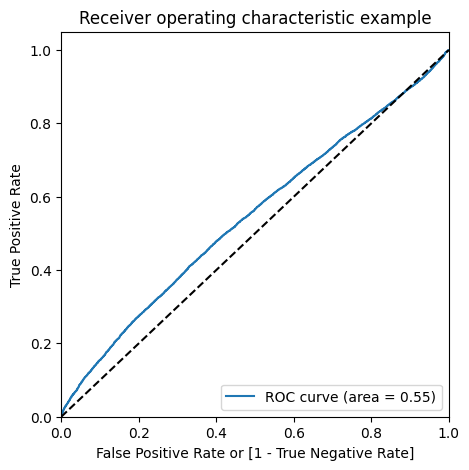

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [128]:
#potimal cutoff point
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.446977,0,1,1,1,1,1,0,0,0,0,0
1,0,0.517740,1,1,1,1,1,1,1,0,0,0,0
2,0,0.510623,1,1,1,1,1,1,1,0,0,0,0
3,0,0.537789,1,1,1,1,1,1,1,0,0,0,0
4,0,0.592060,1,1,1,1,1,1,1,0,0,0,0


In [129]:
#checiking specificity, accuracy and sesitivity
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)

     prob  accuracy  sensi  speci
0.0   0.0  0.497901    1.0    0.0
     prob  accuracy  sensi  speci
0.0   0.0  0.497901    1.0    0.0
0.1   0.1  0.497901    1.0    0.0
     prob  accuracy  sensi  speci
0.0   0.0  0.497901    1.0    0.0
0.1   0.1  0.497901    1.0    0.0
0.2   0.2  0.497901    1.0    0.0
     prob  accuracy     sensi     speci
0.0   0.0  0.497901  1.000000  0.000000
0.1   0.1  0.497901  1.000000  0.000000
0.2   0.2  0.497901  1.000000  0.000000
0.3   0.3  0.498192  0.999824  0.000755
     prob  accuracy     sensi     speci
0.0   0.0  0.497901  1.000000  0.000000
0.1   0.1  0.497901  1.000000  0.000000
0.2   0.2  0.497901  1.000000  0.000000
0.3   0.3  0.498192  0.999824  0.000755
0.4   0.4  0.498571  0.997775  0.003542
     prob  accuracy     sensi     speci
0.0   0.0  0.497901  1.000000  0.000000
0.1   0.1  0.497901  1.000000  0.000000
0.2   0.2  0.497901  1.000000  0.000000
0.3   0.3  0.498192  0.999824  0.000755
0.4   0.4  0.498571  0.997775  0.003542
0.5   0.5  0.5

In [130]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)
# Predict on test data
y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
10360,1,0.499159,0
32166,0,0.483151,0
10047,1,0.457714,0
42417,0,0.471969,0
15123,1,0.444111,0


In [131]:
#checking accuracy:
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[4880 2398]
 [4456 2966]]

Accuracy : 0.5337414965986395


In [132]:
abs(res.params).sort_values(ascending=False)[0:11]

isd_og_mou_8          0.291690
gd_ph_isd_og_mou      0.152110
gd_ph_loc_og_mou      0.109744
loc_og_mou_8          0.100980
gd_ph_ic_others       0.088959
vbc_3g_8              0.088681
gd_ph_spl_ic_mou      0.085123
gd_ph_max_rech_amt    0.079020
gd_ph_og_others       0.065339
spl_og_mou_8          0.059491
gd_ph_sachet_3g       0.054724
dtype: float64

Decision Tree

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.6274709895620736
              precision    recall  f1-score   support

           0       0.55      0.78      0.64      7278
           1       0.63      0.37      0.47      7422

    accuracy                           0.57     14700
   macro avg       0.59      0.57      0.56     14700
weighted avg       0.59      0.57      0.55     14700



ImportError: ignored

In [137]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [138]:
grid_search.best_score_
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=40, random_state=42)

In [139]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      7278
           1       0.75      0.66      0.70      7422

    accuracy                           0.72     14700
   macro avg       0.72      0.72      0.72     14700
weighted avg       0.72      0.72      0.72     14700



##Strategies to Manage Customer Churn
The top 10 predictors are :

Features
loc_og_mou_8

total_rech_num_8

monthly_3g_8

monthly_2g_8

gd_ph_loc_og_mou

gd_ph_total_rech_num

last_day_rch_amt_8

std_ic_t2t_mou_8

sachet_2g_8

Top predictors mainly come from the action phase due to the noticeable drop in engagement during that period.

Additional factors from the exploratory data analysis (EDA) to consider:

Users with a maximum recharge amount consistently below 200 in the 'good' phase should be tagged and regularly assessed, as they are more prone to churn.
Users with less than 4 years of association with the network should be monitored periodically, as the data indicates that users in this category tend to churn more.
MOU (Minutes of Usage) is a significant factor, but VBC (Volume Based Charging), especially if the user is not using a data pack, is another important factor to watch out for.



